# Shadow of a Kerr black hole

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.3.beta6, Release Date: 2021-01-17'

In [2]:
%display latex

## Functions $\ell_{\rm c}(r_0)$ and $q_{\rm c}(r_0)$ for critical null geodesics

We use $m=1$ and denote $r_0$ simply by $r$.

In [3]:
a, r = var('a r') 

In [4]:
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [5]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

The radii $r_+$ and $r_-$ of the two horizons:

In [6]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)

## Critical radii $r_{\rm ph}^{**}$, $r_{\rm ph}^*$, $r_{\rm ph}^+$, $r_{\rm ph}^-$, $r_{\rm ph}^{\rm ms}$ and $r_{\rm ph}^{\rm pol}$ 

In [7]:
rph_ss(a) = 1/2 + cos(2/3*asin(a) + 2*pi/3)
rph_ss

a |--> cos(2/3*pi + 2/3*arcsin(a)) + 1/2

In [8]:
rph_s(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rph_s

a |--> 4*cos(4/3*pi + 1/3*arccos(-a))^2

In [9]:
rph_p(a) = 4*cos(acos(-a)/3)^2
rph_p

a |--> 4*cos(1/3*arccos(-a))^2

In [10]:
rph_m(a) = 4*cos(acos(a)/3)^2
rph_m

a |--> 4*cos(1/3*arccos(a))^2

We add the radius of the marginally stable orbit:

In [11]:
rph_ms(a) = 1 - (1 - a^2)^(1/3)
rph_ms

a |--> -(-a^2 + 1)^(1/3) + 1

as well as the radius of outer and inner polar orbits:

In [12]:
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(1/3*arccos(-(a^2 - 1)/(-1/3*a^2 + 1)^(3/2))) + 1

In [13]:
rph_pol_in(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)) + 2*pi/3)
rph_pol_in

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(2/3*pi + 1/3*arccos(-a^2/(-1/3*a^2 + 1)^(3/2) + 1/(-1/3*a^2 + 1)^(3/2))) + 1

In [14]:
a0 = 0.95
# a0 = 1
show(LatexExpr(r'r_{\rm ph}^{**} = '), n(rph_ss(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm ms} = '), n(rph_ms(a0)))
show(LatexExpr(r'r_{\rm ph}^{*} = '), n(rph_s(a0)))
show(LatexExpr(r'r_- = '), n(rm(a0)))
show(LatexExpr(r'r_+ = '), n(rp(a0)))
show(LatexExpr(r'r_{\rm ph}^+ = '), n(rph_p(a0)))
show(LatexExpr(r'r_{\rm ph}^- = '), n(rph_m(a0)))

r_{\rm ph}^{**} =  -0.477673658836338

r_{\rm ph}^{\rm ms} =  0.539741795874205

r_{\rm ph}^{*} =  0.658372153864346

r_- =  0.687750100080080

r_+ =  1.31224989991992

r_{\rm ph}^+ =  1.38628052846298

r_{\rm ph}^- =  3.95534731767268

In [15]:
r1 = rph_p(a0)
r2 = rph_m(a0)

#r1 = n(rph_ss(a0))
#r2 = 0

r1, r2

(1.38628052846298, 3.95534731767268)

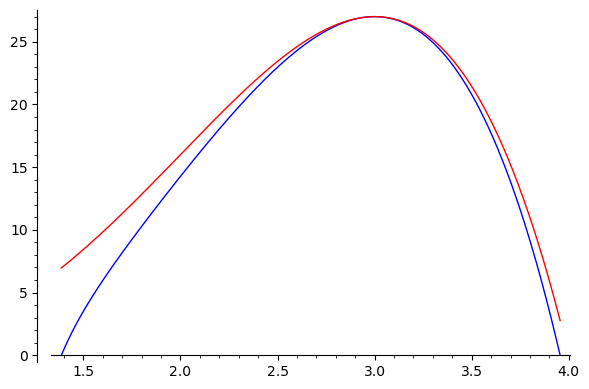

In [16]:
r = var('r')
plot(qsph(a0, r), (r, r1, r2)) + plot(r^3*(4 - r), (r, r1, r2), color='red')

In [17]:
def alpha(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
    else:
        ell = lsph(a, r0)
    return - ell / sin(th_obs)

def Theta(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
        q = r0^3 * (4 - r0)
    else:
        ell = lsph(a, r0)
        q = qsph(a, r0)
    return q + cos(th_obs)^2 * (a^2 - ell^2/sin(th_obs)^2)

def beta(a, th_obs, r0, eps_theta=1):
    return eps_theta * sqrt(Theta(a, th_obs, r0,))

In [18]:
def r0_bounds(a, th_obs, outer=True):
    r"""
    Return `(r0_min, r0_max)`
    """
    if outer:
        r1 = n(rph_p(a))
        r2 = n(rph_m(a))
        r3 = rph_pol(a)
    else:
        r1 = n(rph_ss(a))
        r2 = 0
        r3 = rph_pol_in(a)
    try:
        rmin = find_root(lambda r: Theta(a, th_obs, r), r1, r3)
        rmax = find_root(lambda r: Theta(a, th_obs, r), r3, r2)
    except TypeError:  # special case th_obs = pi/2
        rmin = r1
        rmax = r2
    return (rmin, rmax)

In [19]:
th_obs = pi/2 
#th_obs = n(160/180*pi)  # M87 value
# th_obs = 1.e-3
show(LatexExpr(r'\theta_{\mathscr{O}} = '), n(th_obs))

\theta_{\mathscr{O}} =  1.57079632679490

In [20]:
fa = lambda r: alpha(a0, th_obs, r)
fb = lambda r: beta(a0, th_obs, r)
fbm = lambda r: beta(a0, th_obs, r, eps_theta=-1)

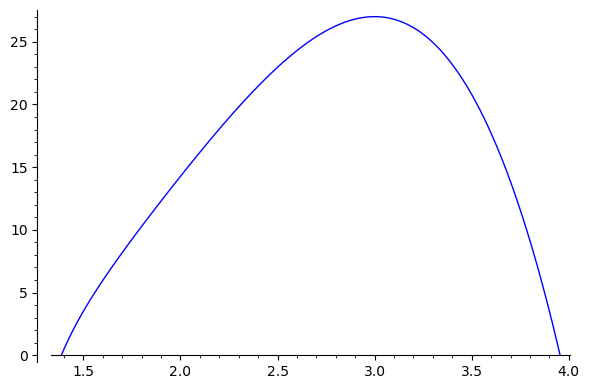

In [21]:
plot(Theta(a0, th_obs, r), (r, r1, r2))

In [22]:
rmin, rmax = r0_bounds(a0, th_obs)
rmin - r1, rmax - r2

(0.000000000000000, 0.000000000000000)

In [23]:
fa(rmin), fa(rmax)

(-2.58221244493685, 6.91641650063537)

In [24]:
fb(rmin), fb(rmax)

(5.73939650993649e-24 + 9.37314581466670e-8*I, 5.90445633372987e-8)

In [25]:
def shadow_plot(a, th_obs, outer=True, color=None, number_colors=5, 
                range_col=None, show_legend=True, legend_loc=(1.02, 0.36), 
                fill=True):
    rmin, rmax = r0_bounds(a, th_obs, outer=outer)
    if rmin > 0:
        rmin = 1.00000001*rmin
        rmax = 0.99999999*rmax
    else:
        rmin = 0.9999999*rmin
        rmax = 1.0000001*rmax
    print("rmin : ", rmin, "  rmax : ", rmax)
    fa = lambda r: alpha(a, th_obs, r)
    fb = lambda r: beta(a, th_obs, r)
    fbm = lambda r: beta(a, th_obs, r, eps_theta=-1)
    if range_col is None:
        range_col = r0_bounds(a, pi/2, outer=outer)
    rmin_col, rmax_col = range_col 
    print("rmin_col : ", rmin_col, "  rmax_col : ", rmax_col)
    dr = (rmax_col - rmin_col) / number_colors
    rm = rmin_col + int((rmin - rmin_col)/dr)*dr
    r1s = rmin
    r_ranges = []
    while rm + dr < rmax:
        col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
        r2s = rm + dr
        r_ranges.append((r1s, r2s, col))
        rm += dr
        r1s = r2s
    if color is None:
        col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
    else:
        col = color
    r_ranges.append((r1s, rmax, col))
    # print("r_ranges: ", r_ranges)
    g = Graphics()
    legend_label = None  # a priori
    for rg in r_ranges:
        r1s, r2s = rg[0], rg[1]
        col = rg[2]
        if show_legend:
            legend_label = r"${:.2f}\, m \leq r_0 \leq {:.2f}\, m$".format(float(r1s), 
                                                                           float(r2s))
        g += parametric_plot((fa, fb), (r1s, r2s), plot_points=200, color=col, 
                             thickness=2, legend_label=legend_label, 
                             frame=True, gridlines=True)
        g += parametric_plot((fa, fbm), (r1s, r2s), plot_points=200, color=col, 
                             thickness=2)
    if fill:
        g += parametric_plot((fa, fb), (rmin, rmax), fill=True, thickness=0)
        g += parametric_plot((fa, fbm), (rmin, rmax), fill=True, thickness=0)
    g.axes_labels([r"$(r_{\mathscr{O}}/m)\; \alpha$", 
                   r"$(r_{\mathscr{O}}/m)\; \beta$"])
    g.set_aspect_ratio(1)
    if show_legend:
        g.set_legend_options(handlelength=2, loc=legend_loc)
    return g

rmin :  1.38628054232578   rmax :  3.95534727811920
rmin_col :  1.38628052846298   rmax_col :  3.95534731767268


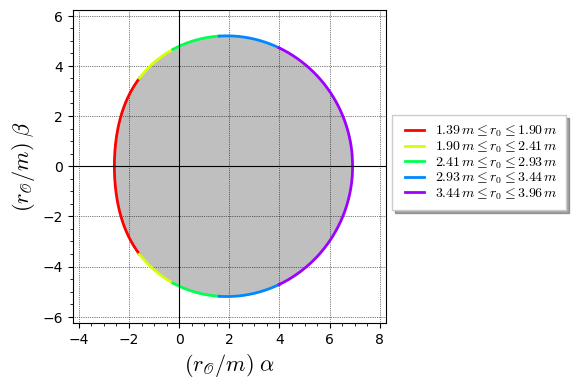

In [26]:
g1 = shadow_plot(a0, pi/2)
g1.set_axes_range(-4, 8, -6, 6)
g1.save('gik_shadow_a95_th90.pdf')
g1

rmin :  1.54632082701639   rmax :  3.53769021424612
rmin_col :  1.38628052846298   rmax_col :  3.95534731767268


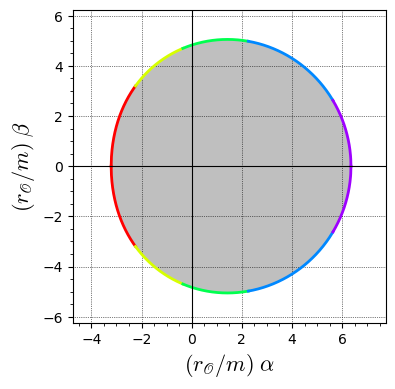

In [27]:
g1 = shadow_plot(a0, pi/4, show_legend=False)
g1.set_axes_range(-4.5, 7.5, -6, 6)
g1.save('gik_shadow_a95_th45.pdf')
g1

rmin :  1.76846188276999   rmax :  3.23697774665377
rmin_col :  1.38628052846298   rmax_col :  3.95534731767268


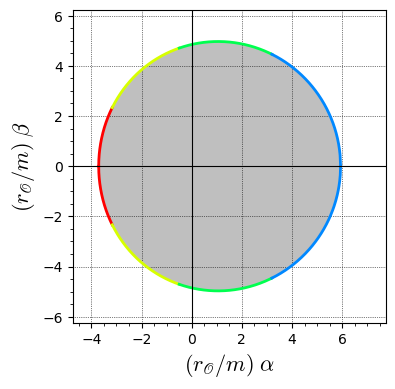

In [28]:
g1 = shadow_plot(a0, pi/6, show_legend=False)
g1.set_axes_range(-4.5, 7.5, -6, 6)
g1.save('gik_shadow_a95_th30.pdf')
g1

rmin :  2.49118715973461   rmax :  2.49420141399888
rmin_col :  1.38628052846298   rmax_col :  3.95534731767268


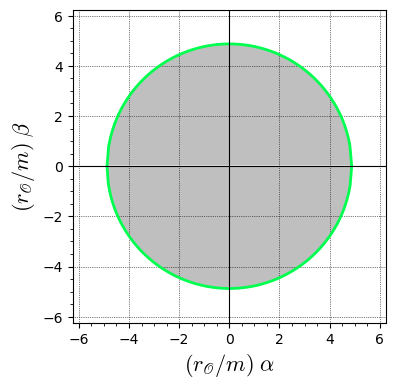

In [29]:
g1 = shadow_plot(a0, 1e-3, show_legend=False)
g1.set_axes_range(-6, 6, -6, 6)
g1.save('gik_shadow_a95_th00.pdf')
g1

rmin :  1.00000001000000   rmax :  3.99999996000000
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000


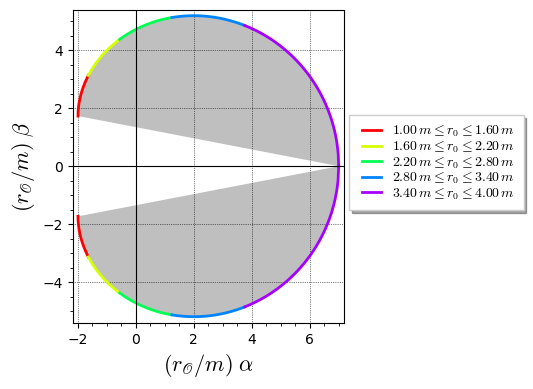

In [30]:
shadow_plot(1, pi/2)

rmin :  1.00000001000000   rmax :  3.99999996000000
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000
rmin :  2.34729637880682   rmax :  3.53208885091707
rmin_col :  2.3472963553338606   rmax_col :  3.5320888862379562
rmin :  2.88219375726555   rmax :  3.11334855853528
rmin_col :  2.88219372844361   rmax_col :  3.11334858966877


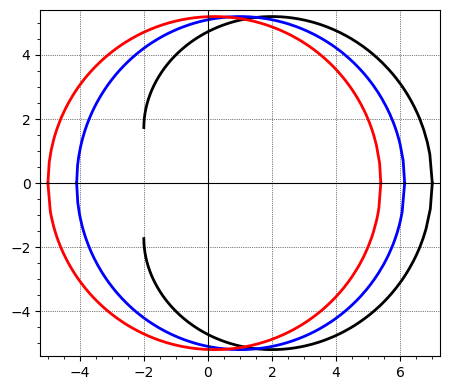

In [31]:
shadow_plot(1, pi/2, number_colors=1, color='black', show_legend=False, fill=False) \
+ shadow_plot(0.5, pi/2, number_colors=1, color='blue', show_legend=False, fill=False) \
+ shadow_plot(0.1, pi/2, number_colors=1, show_legend=False, fill=False)

rmin :  2.41250630313641   rmax :  2.41592046802216
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000
rmin :  2.88260669342186   rmax :  2.88382889826327
rmin_col :  2.3472963553338606   rmax_col :  3.5320888862379562
rmin :  2.99543162081741   rmax :  2.99566297381077
rmin_col :  2.88219372844361   rmax_col :  3.11334858966877


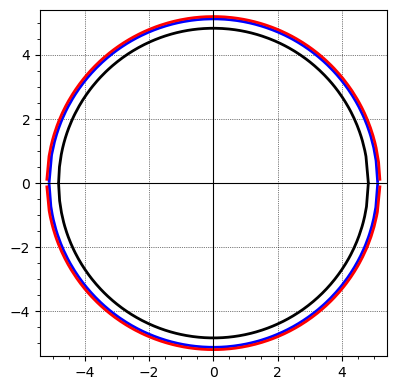

In [32]:
shadow_plot(1, 1e-3, number_colors=1, color='black', show_legend=False, fill=False) \
+ shadow_plot(0.5, 1e-3, number_colors=1, color='blue', show_legend=False, fill=False) \
+ shadow_plot(0.1, 1e-3, number_colors=1, show_legend=False, fill=False)

rmin :  1.00000001000000   rmax :  3.99999996000000
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000
rmin :  1.05826009412625   rmax :  3.55486581066046
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000
rmin :  2.41404287406783   rmax :  2.41438424713942
rmin_col :  1.00000000000000   rmax_col :  4.00000000000000


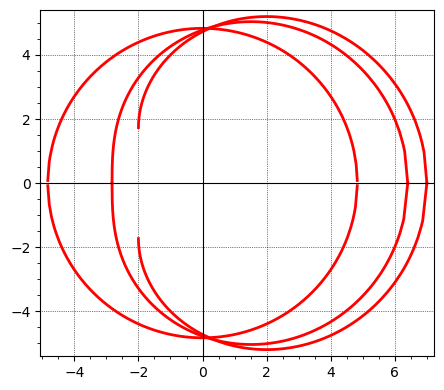

In [33]:
shadow_plot(1, pi/2, number_colors=1, show_legend=False, fill=False) \
+ shadow_plot(1, pi/4, number_colors=1, show_legend=False, fill=False) \
+ shadow_plot(1, 1e-4, number_colors=1, show_legend=False, fill=False)